## Internship - MICS - CentraleSupelec - Felipe Moret & Ioane Muni Toke

In [82]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



**Investigating tick by tick data - Reconstruction of Order Flow using Aggregated Data**

**Reading Data**

In [2]:
quote_data_path = "/Users/felipemoret/Desktop/MICS_Internship/FR/book/BNPP.PA/2016-01-04-BNPP.PA-book.csv.gz"
trade_data_path = "/Users/felipemoret/Desktop/MICS_Internship/FR/trade/BNPP.PA/2016-01-04-BNPP.PA-trade.csv.gz"

##Reading order book (quotes) data
quote_data = pd.read_csv(quote_data_path, compression ='gzip', error_bad_lines = False)
trade_data = pd.read_csv(trade_data_path, compression ='gzip', error_bad_lines = False)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Correcting columns' index for quotes data**

In [3]:
quote_data.head()

,xltime,Unnamed: 1,bid-price-1,bid-volume-1,ask-price-1,ask-volume-1,bid-price-2,bid-volume-2,ask-price-2,ask-volume-2,bid-price-3,bid-volume-3,ask-price-3,ask-volume-3,bid-price-4,bid-volume-4,ask-price-4,ask-volume-4,bid-price-5,bid-volume-5,ask-price-5,ask-volume-5,bid-price-6,bid-volume-6,ask-price-6,ask-volume-6,bid-price-7,bid-volume-7,ask-price-7,ask-volume-7,bid-price-8,bid-volume-8,ask-price-8,ask-volume-8,bid-price-9,bid-volume-9,ask-price-9,ask-volume-9,bid-price-10,bid-volume-10,ask-price-10,ask-volume-10
0,42373.218982,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN
1,42373.218982,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN
2,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN
3,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN
4,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN


In [4]:
quote_data_columns = quote_data.columns
quote_data_first_column = quote_data_columns[0] 
quote_data_columns = quote_data.columns[2:]
quote_data_columns = quote_data_columns.insert(0, quote_data_first_column)

In [5]:
quote_data = quote_data.iloc[: , :-1]

In [6]:
quote_data.columns = quote_data_columns

In [7]:
quote_data.head()

,xltime,bid-price-1,bid-volume-1,ask-price-1,ask-volume-1,bid-price-2,bid-volume-2,ask-price-2,ask-volume-2,bid-price-3,bid-volume-3,ask-price-3,ask-volume-3,bid-price-4,bid-volume-4,ask-price-4,ask-volume-4,bid-price-5,bid-volume-5,ask-price-5,ask-volume-5,bid-price-6,bid-volume-6,ask-price-6,ask-volume-6,bid-price-7,bid-volume-7,ask-price-7,ask-volume-7,bid-price-8,bid-volume-8,ask-price-8,ask-volume-8,bid-price-9,bid-volume-9,ask-price-9,ask-volume-9,bid-price-10,bid-volume-10,ask-price-10,ask-volume-10
0,42373.218982,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
1,42373.218982,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
3,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
4,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()


**Converting excel datetime for Paris datetime**

In [8]:
quote_data['fulldate'] = pd.TimedeltaIndex(quote_data['xltime'], unit = 'd') + dt.datetime(1899,12,30)
quote_data['fulldate'] = quote_data['fulldate'].astype('datetime64[ms]')
quote_data = quote_data.set_index('fulldate').tz_localize('UTC').tz_convert('Europe/Paris').tz_localize(None)
#quote_data = quote_data.reset_index()

In [9]:
quote_data = quote_data.drop("xltime", axis = 1)

In [10]:
quote_data.head()

,bid-price-1,bid-volume-1,ask-price-1,ask-volume-1,bid-price-2,bid-volume-2,ask-price-2,ask-volume-2,bid-price-3,bid-volume-3,ask-price-3,ask-volume-3,bid-price-4,bid-volume-4,ask-price-4,ask-volume-4,bid-price-5,bid-volume-5,ask-price-5,ask-volume-5,bid-price-6,bid-volume-6,ask-price-6,ask-volume-6,bid-price-7,bid-volume-7,ask-price-7,ask-volume-7,bid-price-8,bid-volume-8,ask-price-8,ask-volume-8,bid-price-9,bid-volume-9,ask-price-9,ask-volume-9,bid-price-10,bid-volume-10,ask-price-10,ask-volume-10
fulldate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04 06:15:20.042,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2016-01-04 06:15:20.042,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2016-01-04 06:15:20.042,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2016-01-04 06:15:20.042,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2016-01-04 06:15:20.042,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()


**Correcting columns' index for trades data**

In [11]:
trade_data.columns = ['ts', 'price', 'volume', 'flag', 'rawflag']

In [12]:
trade_data.head(5)

,ts,price,volume,flag,rawflag
0,42373.100934,52.59,0.0,settlementprice,[BNPP]Settlement Price
1,42373.231234,52.23,0.0,settlementprice,[BNPP]Settlement Price
2,42373.260417,52.23,0.0,auctionphase,[BNPP]Auction Phase
3,42373.260418,52.23,0.0,theoricalprice|auctionphase,[PRC_QL_CD]IND[BNPP]Auction Phase
4,42373.260735,52.20,50.0,auctionphase,[BNPP]Auction Phase


**FIltering trade data for only "uncategorized" flag**

In [13]:
trade_data = trade_data[trade_data["flag"] == "uncategorized"]

In [14]:
trade_data.shape

(20200, 5)

**Converting excel datetime for Paris datetime**

In [15]:
trade_data['fulldate'] = pd.TimedeltaIndex(trade_data['ts'], unit = 'd') + dt.datetime(1899,12,30)
trade_data['fulldate'] = trade_data['fulldate'].astype('datetime64[ms]')
trade_data = trade_data.set_index('fulldate').tz_localize('UTC').tz_convert('Europe/Paris').tz_localize(None)
#trade_data = trade_data.reset_index()

In [16]:
trade_data = trade_data.drop("ts", axis = 1)

In [17]:
trade_data.head(5)

,price,volume,flag,rawflag
fulldate,,,,
2016-01-04 09:00:29.483,51.75,47.0,uncategorized,[ACT_FLAG1] [PRC_QL_CD]
2016-01-04 09:00:29.483,51.75,26.0,uncategorized,[ACT_FLAG1]
2016-01-04 09:00:29.483,51.75,1.0,uncategorized,[ACT_FLAG1]
2016-01-04 09:00:29.483,51.75,47.0,uncategorized,[ACT_FLAG1]
2016-01-04 09:00:29.483,51.75,50.0,uncategorized,[ACT_FLAG1]


**Analyzing number of repeated records**

In [18]:
print(trade_data.duplicated().sum())

8821


## Parsing the Quotes Data

**Analyzing the number of missing data**

In [19]:
quote_data.isna().sum()

bid-price-1      0
bid-volume-1     0
ask-price-1      0
ask-volume-1     0
bid-price-2      0
bid-volume-2     0
ask-price-2      0
ask-volume-2     0
bid-price-3      0
bid-volume-3     0
ask-price-3      0
ask-volume-3     0
bid-price-4      0
bid-volume-4     0
ask-price-4      0
ask-volume-4     0
bid-price-5      0
bid-volume-5     0
ask-price-5      0
ask-volume-5     0
bid-price-6      0
bid-volume-6     0
ask-price-6      0
ask-volume-6     0
bid-price-7      0
bid-volume-7     0
ask-price-7      0
ask-volume-7     0
bid-price-8      0
bid-volume-8     0
ask-price-8      0
ask-volume-8     0
bid-price-9      0
bid-volume-9     0
ask-price-9      0
ask-volume-9     0
bid-price-10     0
bid-volume-10    0
ask-price-10     0
ask-volume-10    0
dtype: int64

**Shape of the quotes data**

In [20]:
quote_data.shape

(504824, 40)

**Analyzing number of repeated records**

In [21]:
print(quote_data.duplicated().sum())

11695


**Removing duplicated rows**

In [22]:
quote_data = quote_data[~quote_data.duplicated()]

In [23]:
quote_data.shape

(493129, 40)

**Fixing a time period within the day for working...**

In [123]:
##initial_period = trade_data.index[0]
initial_period = pd.Timestamp('2016-01-04 09:10:00.00')

In [124]:
initial_period

Timestamp('2016-01-04 09:10:00')

In [125]:
##final_period = trade_data.index[-1]
final_period = pd.Timestamp('2016-01-04 09:15:00.00')

In [126]:
final_period

Timestamp('2016-01-04 09:15:00')

**Getting quote_data and trade_data in the specified [initial_period, final_period]**

In [127]:
mask_quote = (quote_data.index > initial_period) & (quote_data.index <= final_period)
reduced_quote_data = quote_data[mask_quote] 

In [128]:
reduced_quote_data.shape

(4957, 40)

In [129]:
mask_trade = (trade_data.index > initial_period) & (trade_data.index <= final_period)
reduced_trade_data = trade_data[mask_trade] 

In [130]:
reduced_trade_data.shape

(242, 4)

**Function to find LIMIT ORDER OR (A PRIORI) CANCELLATIONS in the Limit Order Book**

In [131]:
def return_changes_between_timestamps(reduced_quote_data):
        
    reduced_quote_data = reduced_quote_data.apply(pd.to_numeric)
    parsed_order_book = reduced_quote_data.diff()
    
    return parsed_order_book    

In [132]:
parsed_order_book = return_changes_between_timestamps(reduced_quote_data)

In [133]:
parsed_order_book = parsed_order_book.iloc[1:]

In [134]:
parsed_order_book.shape

(4956, 40)

In [135]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [136]:
def classify_changes_parsed_order_book_before_trading_match(reduced_quote_data, parsed_order_book):
    
    prices_bid_indices = [0,4,8,12,16,20,24,28,32,36]
    prices_ask_indices = [2,6,10,14,18,22,26,30,34,38]
    volume_bid_indices = [1,5,9,13,17,21,25,29,33,37]
    volume_ask_indices = [3,7,11,15,19,23,27,31,35,39]
        
    columns_names = ["Timestamp", "Level", "Side", "Price", "Quantity", "Flow"]
    before_trade_match_order_flow = pd.DataFrame( columns = columns_names)
    
    number_of_records = parsed_order_book.shape[0]
    
    ## Analyzing timestamps where only one change took place (one volume column)
    for i in range(0, number_of_records):
        change_indexes = list(parsed_order_book.iloc[i].to_numpy().nonzero()[0])
        if(intersection(change_indexes, (prices_bid_indices + prices_ask_indices)) == []):
            for volume_change_column_index in change_indexes:
                quantity = parsed_order_book.iloc[i].values[volume_change_column_index]
                if volume_change_column_index in volume_bid_indices:
                    level = volume_bid_indices.index(volume_change_column_index) + 1
                    side = "BID"
                else:
                    level = volume_ask_indices.index(volume_change_column_index) + 1
                    side = "ASK"
                if quantity > 0:
                    flow = "LIMIT ORDER"
                else:
                    flow = "CANCELLATION"
                timestamp = parsed_order_book.iloc[i].name
                price = reduced_quote_data.iloc[i+1].values[volume_change_column_index - 1]
                to_append = [timestamp, level, side, price, quantity, flow]
                to_append_series = pd.Series(to_append, index = before_trade_match_order_flow.columns)
                before_trade_match_order_flow  = before_trade_match_order_flow.append(to_append_series, ignore_index = True)
        else:
            for price_change_column_index in intersection(change_indexes, prices_bid_indices + prices_ask_indices):
                if(price_change_column_index in prices_bid_indices):
                    level = prices_bid_indices.index(price_change_column_index) + 1
                    side = "BID"  
                else:
                    level = prices_ask_indices.index(price_change_column_index) + 1
                    side = "ASK"
                                     
                price = reduced_quote_data.iloc[i+1].values[price_change_column_index]
   
                if(level == 1):
                    price_in_line_above_posterior_level = reduced_quote_data.iloc[i].values[price_change_column_index + 4]
                    if(float(price) ==  float(price_in_line_above_posterior_level)):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i].values[price_change_column_index + 1 + 4])
                        price_in_line_above_same_level = reduced_quote_data.iloc[i].values[price_change_column_index]
                        quantity_in_live_above_same_level = float(reduced_quote_data.iloc[i].values[price_change_column_index + 1])
                        to_append = [timestamp, level, side, price_in_line_above_same_level, -1*quantity_in_live_above_same_level, "CANCELLATION"]
                        to_append_series = pd.Series(to_append, index = before_trade_match_order_flow.columns)
                        before_trade_match_order_flow  = before_trade_match_order_flow.append(to_append_series, ignore_index = True)
                    else:
                        quantity = reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]
                    quantity = float(quantity)
                    
                elif(level == 10):
                    price_in_line_above_previous_level = reduced_quote_data.iloc[i].values[price_change_column_index - 4]
                    if(float(price) ==  float(price_in_line_above_previous_level)):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i].values[price_change_column_index + 1 - 4])
                    else:
                        if(i >= 1):
                            price_in_two_lines_above_same_level =  reduced_quote_data.iloc[i-1].values[price_change_column_index]
                            if(float(price) ==  float(price_in_two_lines_above_same_level)):
                                quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i-1].values[price_change_column_index + 1])
                        else:
                            quantity = "ERROR"
                            flow = "ERROR"              
                else:
                    price_in_line_above_posterior_level = reduced_quote_data.iloc[i].values[price_change_column_index + 4]
                    price_in_line_above_previous_level = reduced_quote_data.iloc[i].values[price_change_column_index - 4]
                    price_in_line_above_same_level = reduced_quote_data.iloc[i].values[price_change_column_index]
                    price_in_same_line_posterior_level = reduced_quote_data.iloc[i+1].values[price_change_column_index + 4]
                    if(float(price) ==  float(price_in_line_above_previous_level)):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i].values[price_change_column_index + 1 - 4])
                    elif(float(price) ==  float(price_in_line_above_posterior_level)):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i].values[price_change_column_index + 1 + 4])
                    
                    elif(price_in_line_above_same_level == price_in_same_line_posterior_level):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1])
                    else:
                        quantity = "ERROR"
                        flow = "ERROR"
                    
                if(quantity != "ERROR" and quantity > 0):
                    flow = "LIMIT ORDER"
                if(quantity != "ERROR" and  quantity < 0):
                    flow = "CANCELLATION"
                timestamp = parsed_order_book.iloc[i].name
                to_append = [timestamp, level, side, price, quantity, flow]
                to_append_series = pd.Series(to_append, index = before_trade_match_order_flow.columns)
                if(quantity != 0):
                    before_trade_match_order_flow  = before_trade_match_order_flow.append(to_append_series, ignore_index = True)
                
            remaining_change_indexes = list(set(change_indexes) - set(intersection(change_indexes, prices_bid_indices + prices_ask_indices)))
            number_of_indexes_volumes_already_checked = len(intersection(change_indexes, prices_bid_indices + prices_ask_indices))
            volumes_already_checked_indexes = intersection(change_indexes, prices_bid_indices + prices_ask_indices) + np.ones(number_of_indexes_volumes_already_checked)
            remaining_change_indexes = list(set(remaining_change_indexes) - set(volumes_already_checked_indexes))
            

            for volume_change_column_index in remaining_change_indexes:
                quantity = parsed_order_book.iloc[i].values[volume_change_column_index]
                if volume_change_column_index in volume_bid_indices:
                    level = volume_bid_indices.index(volume_change_column_index) + 1
                    side = "BID"
                else:
                    level = volume_ask_indices.index(volume_change_column_index) + 1
                    side = "ASK"
                if quantity > 0:
                    flow = "LIMIT ORDER"
                else:
                    flow = "CANCELLATION"
                timestamp = parsed_order_book.iloc[i].name
                price = reduced_quote_data.iloc[i+1].values[volume_change_column_index - 1]
                to_append = [timestamp, level, side, price, quantity, flow]
                to_append_series = pd.Series(to_append, index = before_trade_match_order_flow.columns)
                before_trade_match_order_flow  = before_trade_match_order_flow.append(to_append_series, ignore_index = True)
            
    return before_trade_match_order_flow    

In [137]:
before_trade_match_order_flow = classify_changes_parsed_order_book_before_trading_match(reduced_quote_data, parsed_order_book)

In [138]:
before_trade_match_order_flow.head()

,Timestamp,Level,Side,Price,Quantity,Flow
0,2016-01-04 09:10:00.043,1,ASK,50.95,250.0,LIMIT ORDER
1,2016-01-04 09:10:00.043,1,BID,50.92,-72.0,CANCELLATION
2,2016-01-04 09:10:00.043,1,ASK,50.95,-250.0,CANCELLATION
3,2016-01-04 09:10:00.043,3,BID,50.9,-282.0,CANCELLATION
4,2016-01-04 09:10:00.043,3,BID,50.9,-100.0,CANCELLATION


In [139]:
before_trade_match_order_flow.shape

(7067, 6)

**Is there a quote that is classified as an error ?**

In [140]:
before_trade_match_order_flow[before_trade_match_order_flow['Flow'] == 'ERROR']

,Timestamp,Level,Side,Price,Quantity,Flow


## Trying a first match with trade data - Direct matching

In [141]:
def direct_trade_match(before_trade_match_order_flow, reduced_trade_data):
            
    before_trade_match_cancellations = before_trade_match_order_flow[before_trade_match_order_flow["Flow"] == "CANCELLATION"]
    before_trade_match_cancellations = before_trade_match_cancellations[["Timestamp","Price","Quantity"]]
    before_trade_match_cancellations["Quantity"] = -1*before_trade_match_cancellations["Quantity"]
    before_trade_match_cancellations = before_trade_match_cancellations.reset_index()
    trade_data = reduced_trade_data[["price","volume"]]
    trade_data = trade_data.rename(columns = {"price":"Price", "volume":"Quantity"})
    trade_data = trade_data.reset_index()
    trade_data = trade_data.rename(columns = {"fulldate":"Timestamp"})
    before_trade_match_cancellations[["Price", "Quantity"]] = before_trade_match_cancellations[["Price", "Quantity"]].apply(pd.to_numeric)
    trade_data[["Price", "Quantity"]] = trade_data[["Price", "Quantity"]].apply(pd.to_numeric)
    number_of_trades = trade_data.shape[0]
    
    matched_results_price_quantity = 0
    matched_results_price_quantity_timestamp = 0

    
    ##Direct match Price-Volume
    for i in range(0, number_of_trades):
        if(list(trade_data[["Price", "Quantity"]].iloc[i].values) in list(map(list, list(before_trade_match_cancellations[["Price", "Quantity"]].values)))):
            matched_results_price_quantity += 1
            
    ##Direct match Timestamp-Price-Volume
    for i in range(0, number_of_trades):
        if(list(trade_data[["Timestamp", "Price", "Quantity"]].iloc[i].values) in list(map(list, list(before_trade_match_cancellations[["Timestamp", "Price", "Quantity"]].values)))):
            matched_results_price_quantity_timestamp += 1
                                              
    print(f"Percentage of matched trades only by Price-Volume: {100*(matched_results_price_quantity/number_of_trades):.2f}%\n")
    print(f"Percentage of matched trades by Timestamp-Price-Volume: {100*(matched_results_price_quantity_timestamp/number_of_trades):.2f}%\n")
    

In [143]:
direct_trade_match(before_trade_match_order_flow, reduced_trade_data)

Percentage of matched trades only by Price-Volume: 96.28%

Percentage of matched trades by Timestamp-Price-Volume: 13.64%



## Trying direct match permitting a $\delta$-lag in timestamp differences

**Here we permit that the difference between the timestamps of a market order in the trades file and of a "cancellation" in the quotes file to be in the interval $[-\delta, +\delta]$.**

In [144]:
def trade_match_with_delta_lag(before_trade_match_order_flow, reduced_trade_data, min_delta, max_delta, number_deltas):    
    
    delta_vector = np.linspace(min_delta, max_delta, number_deltas).astype(int)
    matched_results_price_quantity_timestamp_by_delta_lag = np.zeros(number_deltas)
    differences_between_quote_and_trade_timestamps = []
    
    before_trade_match_cancellations = before_trade_match_order_flow[before_trade_match_order_flow["Flow"] == "CANCELLATION"]
    before_trade_match_cancellations = before_trade_match_cancellations[["Timestamp","Price","Quantity"]]
    before_trade_match_cancellations["Quantity"] = -1*before_trade_match_cancellations["Quantity"]
    before_trade_match_cancellations = before_trade_match_cancellations.reset_index()
    trade_data = reduced_trade_data[["price","volume"]]
    trade_data = trade_data.rename(columns = {"price":"Price", "volume":"Quantity"})
    trade_data = trade_data.reset_index()
    trade_data = trade_data.rename(columns = {"fulldate":"Timestamp"})
    before_trade_match_cancellations[["Price", "Quantity"]] = before_trade_match_cancellations[["Price", "Quantity"]].apply(pd.to_numeric)
    trade_data[["Price", "Quantity"]] = trade_data[["Price", "Quantity"]].apply(pd.to_numeric)
    number_of_trades = trade_data.shape[0]

    j = 0
    for delta in delta_vector: 
        before_trade_match_cancellations_tmp = before_trade_match_cancellations.copy()
        for i in range(0, number_of_trades):
            differences_between_timestamps = []
            if(list(trade_data[["Price", "Quantity"]].iloc[i].values) in list(map(list, list(before_trade_match_cancellations_tmp[["Price", "Quantity"]].values)))):
                price = trade_data["Price"].iloc[i]
                quantity = trade_data["Quantity"].iloc[i]
                trade_timestamp = trade_data["Timestamp"].iloc[i]
                list_of_matches = before_trade_match_cancellations_tmp[(before_trade_match_cancellations_tmp["Price"] == price) & (before_trade_match_cancellations_tmp["Quantity"] == quantity)]
                timestamps_of_matches = list(list_of_matches["Timestamp"])
                for matched_timestamp in timestamps_of_matches:
                    differences_between_timestamps.append((trade_timestamp - matched_timestamp).total_seconds()*1000)

                absolute_differences_between_timestamps = np.abs(differences_between_timestamps)
                minimum_difference = min(absolute_differences_between_timestamps)
                
                if(minimum_difference <= delta):
                    matched_results_price_quantity_timestamp_by_delta_lag[j] += 1
                    number_of_matches = len(timestamps_of_matches)
                    is_positive = 1
                    for k in range(0, number_of_matches):
                        if(minimum_difference == differences_between_timestamps[k]):
                            break
                        if(minimum_difference == -1*differences_between_timestamps[k]):
                            is_positive = 0
                            break
                    before_trade_match_cancellations_tmp.drop(before_trade_match_cancellations_tmp.loc[(before_trade_match_cancellations_tmp['Price'] == price) & (before_trade_match_cancellations_tmp['Quantity'] == quantity) & (before_trade_match_cancellations_tmp['Timestamp'] == timestamps_of_matches[k])].index, inplace = True)
                    if(is_positive):
                        differences_between_quote_and_trade_timestamps.append(minimum_difference)
                    else:
                        differences_between_quote_and_trade_timestamps.append(-1*minimum_difference)
                      
        j += 1
                                
    for i in range(0, number_deltas):
        print(f"Percentage of matched trades by {delta_vector[i]}-ms-LagTimestamp-Price-Volume: {100*(matched_results_price_quantity_timestamp_by_delta_lag[i]/number_of_trades):.2f}%\n")
        
    plt.figure(figsize=(10,8))   
    plt.plot(delta_vector,  1 - matched_results_price_quantity_timestamp_by_delta_lag/number_of_trades, label = "BNPP", color = 'g')
    plt.title(r"Fraction of Unmatched Trades vs $\delta$")
    plt.xlabel(r"$\delta$")
    plt.ylabel("Unmatached Trades Fraction")
    plt.legend()
    plt.show()
    
    return differences_between_quote_and_trade_timestamps 

        

Percentage of matched trades by 0-ms-LagTimestamp-Price-Volume: 13.22%

Percentage of matched trades by 2-ms-LagTimestamp-Price-Volume: 26.86%

Percentage of matched trades by 4-ms-LagTimestamp-Price-Volume: 33.47%

Percentage of matched trades by 6-ms-LagTimestamp-Price-Volume: 38.02%

Percentage of matched trades by 8-ms-LagTimestamp-Price-Volume: 52.89%

Percentage of matched trades by 10-ms-LagTimestamp-Price-Volume: 69.83%

Percentage of matched trades by 12-ms-LagTimestamp-Price-Volume: 77.27%

Percentage of matched trades by 14-ms-LagTimestamp-Price-Volume: 80.58%

Percentage of matched trades by 16-ms-LagTimestamp-Price-Volume: 81.82%

Percentage of matched trades by 18-ms-LagTimestamp-Price-Volume: 84.30%

Percentage of matched trades by 20-ms-LagTimestamp-Price-Volume: 84.71%

Percentage of matched trades by 22-ms-LagTimestamp-Price-Volume: 85.12%

Percentage of matched trades by 24-ms-LagTimestamp-Price-Volume: 85.54%

Percentage of matched trades by 26-ms-LagTimestamp-Price

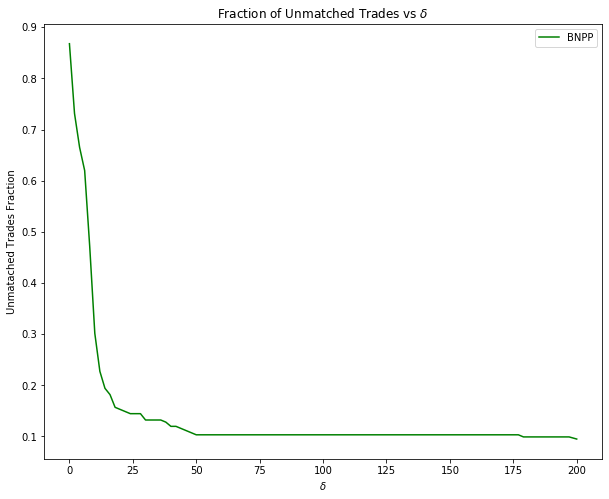

In [146]:
differences_between_quote_and_trade_timestamps = trade_match_with_delta_lag(before_trade_match_order_flow, reduced_trade_data, 0, 200, 100)

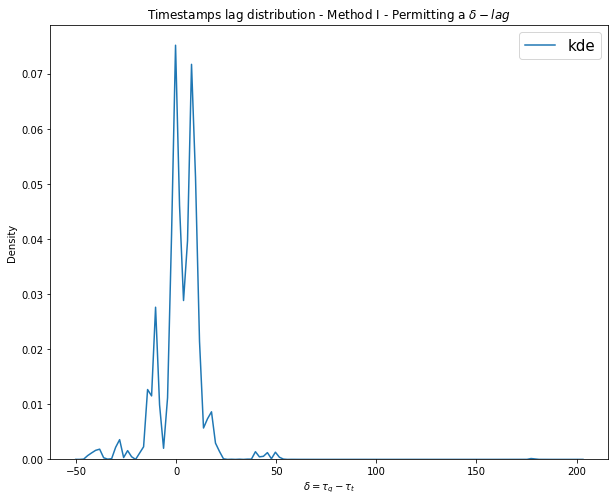

In [147]:
plt.figure(figsize=(10,8))
#plt.hist(differences_between_quote_and_trade_timestamps, bins = 100)
sns.kdeplot(data = differences_between_quote_and_trade_timestamps, label='kde')
plt.title(r"Timestamps lag distribution - Method I - Permitting a $\delta-lag$ ")
plt.xlabel(r"$\delta = \tau_{q} - \tau_{t}$")
plt.ylabel("Density")
plt.legend(loc = 1, prop={'size': 15})